# Question 4
## Out of the gendered words/phrases, which are the most common? 
## Count which one occurs most

In [144]:
'''
Approach:
1. Similar to counting the words that appear the most for job descriptions and job titles
2. Create a count for the gendered words in the job description
3. Create histogram or some sort of pie chart to display that
'''

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv
import requests
import collections
from bs4 import BeautifulSoup
import geopandas as gpd
import pandas_bokeh
from shapely.geometry import Point, Polygon
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from math import pi
from bokeh.plotting import figure, output_file, show
pandas_bokeh.output_notebook()

masculine_themed_wording = [
    "competitive",
    "dominate",
    "leader",
    "rock star",
    "rockstar",
    "guru",
    "ninja",
    "hacker",
    "superhero",
    "prove themselves",
    "analyze",
    "determine",
    "crush it",
    "world class",
    "superior",
    "ambitious",
    "aggressive"
]

s = "active adventurous aggress ambitio analy assert athlet autonom battle boast challeng champion compet confident courag decid decision decisive defend determin domina dominant driven fearless fight force greedy head-strong headstrong hierarch hostil impulsive independen individual intellect lead logic objective opinion outspoken persist principle reckless self-confiden self-relian self-sufficien selfconfiden selfrelian selfsufficien stubborn superior unreasonab"
masculine_themed_wording_updated = s.split()
print(masculine_themed_wording_updated)


states = ['AL',
    'AK',
    'AZ',
    'AR',
    'CA',
    'CO',
    'CT',
    'DE',
    'DC',
    'FL',
    'GA',
    'HI',
    'ID',
    'IL',
    'IN',
    'IA',
    'KS',
    'KY',
    'LA',
    'ME',
    'MD',
    'MA',
    'MI',
    'MN',
    'MS',
    'MO',
    'MT',
    'NE',
    'NV',
    'NH',
    'NJ',
    'NM',
    'NY',
    'NC',
    'ND',
    'OH',
    'OK',
    'OR',
    'PA',
    'RI',
    'SC',
    'SD',
    'TN',
    'TX',
    'UT',
    'VT',
    'VA',
    'WA',
    'WV',
    'WI',
    'WY' ]

states2 = [
    'AK',
    'AZ',
    'AR',
    'CA',
    'CO',
    'CT',
    'DE',
    'DC',
    'FL',
    'GA',
    'HI',
    'ID',
    'IL',
    'IN',
    'IA',
    'KS',
    'KY',
    'LA',
    'ME',
    'MD',
    'MA',
    'MI',
    'MN',
    'MS',
    'MO',
    'MT',
    'NE',
    'NV',
    'NH',
    'NJ',
    'NM',
    'NY',
    'NC',
    'ND',
    'OH',
    'OK',
    'OR',
    'PA',
    'RI',
    'SC',
    'SD',
    'TN',
    'TX',
    'UT',
    'VT',
    'VA',
    'WA',
    'WV',
    'WI',
    'WY' ]



total_jobs = 22000
jobs = pd.read_csv("dice_com-job_us_sample.csv")

#Create a column for the state
jobs["state"] = jobs["joblocation_address"].apply(lambda x: pd.Series(str(x).split(", ")[-1]))
jobs

Loading BokehJS ...

['active', 'adventurous', 'aggress', 'ambitio', 'analy', 'assert', 'athlet', 'autonom', 'battle', 'boast', 'challeng', 'champion', 'compet', 'confident', 'courag', 'decid', 'decision', 'decisive', 'defend', 'determin', 'domina', 'dominant', 'driven', 'fearless', 'fight', 'force', 'greedy', 'head-strong', 'headstrong', 'hierarch', 'hostil', 'impulsive', 'independen', 'individual', 'intellect', 'lead', 'logic', 'objective', 'opinion', 'outspoken', 'persist', 'principle', 'reckless', 'self-confiden', 'self-relian', 'self-sufficien', 'selfconfiden', 'selfrelian', 'selfsufficien', 'stubborn', 'superior', 'unreasonab']


,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id,state
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4,GA
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9,IL
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72,IL
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719,IL
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7,GA
5,https://www.dice.com/jobs/detail/SAP-FICO-Arch...,Yash Technologies,"Full Time, Permanant",We are looking for a Senior SAP FICO Architect...,Dice Id : 10111847,"Chicago, IL",SAP FICO Architect,2 weeks ago,Telecommuting not available|Travel required to...,NaN,"FICO, AR, AP, Asset Management, HAHA",e0ac9d926dda5e95162ef05adea7318c,IL
6,https://www.dice.com/jobs/detail/Network-Engin...,Noble1,"Full Time, Direct Hire",Network Engineer Job Description A Network Eng...,Dice Id : 90884761,"Atlanta, GA",Network Engineer,1 hour ago,Telecommuting not available|Travel not required,NaN,"Cisco, DNS, HTTP, Networking, Network Engineer...",e7e326053c586bd94e59f1fd74de4a1b,GA
7,https://www.dice.com/jobs/detail/Sr.-Web-Appli...,"Bluebeam Software, Inc.","Full Time, Full Time",Bluebeam is looking for talented sr. web devel...,Dice Id : 10110132,"Chicago, IL",Sr. Web Application Developer (Cloud Team) - C...,2 weeks ago,Telecommuting not available|Travel not required,NaN,".NET , C#, MVC, RESTful web services, HTTP, AW...",b0dadecf4c3c2beecb9c773ca11ecda4,IL
8,https://www.dice.com/jobs/detail/Front-End-Dev...,Genesis10,"Full Time, Direct Placement",This is a fulltime position for a Javascript d...,Dice Id : gentx001,"New York, NY",Front End Developer,7 hours ago,Telecommuting not available|Travel not required,NaN,"C++, Developer, Development, JavaScript, User ...",28f5e0c1cc3314813e674f0c32b04d1b,NY
9,https://www.dice.com/jobs/detail/Application-S...,"VanderHouwen & Associates, Inc.","C2H W2, Contract to hire",SummaryOur client is the leading provider of o...,Dice Id : vhassoc,"Seattle, WA",Application Support Engineer,7 hours ago,Telecommuting not available|Travel not required,NaN,(See Job Description),95c9127e2770172f454f3b83981eaa88,WA


In [95]:
'''
1. Take in the word from the updated list 
2. Check if word appears in the description
    - if it does, add it to the list
    - if NOT, do not add it to the list
3. After getting the jobs, get the exclusive jobs using list(set(list_name)) <-- these are indexes
4. With the job descriptions, loop through the list, add each of the columns that we want to its own list
5. Create the column and set it to that list
6. Get the states using the lambda function
'''

# Loops through the updated phrase list and appends to a list with the indexes of the jobs that have the phrases

job_index_list = []
count_list = []

for word in masculine_themed_wording_updated:
    print("Current word: ", word)
    x = jobs['jobdescription'].where(jobs['jobdescription'].str.find(word) > -1)
    #vals = jobs['jobdescription'].str.count(word)
    #print(word, " appears ", vals, " times")
    #print(x)
    count = 0
    for item, frame in x.iteritems():
        if pd.notnull(frame):
            job_index_list.append(item)
            count+=1
    count_list.append(count)        
    
job_index_list_exec = list(set(job_index_list))
print("Length of original list: ", len(job_index_list))
print("Length of exclusive list: ", len(job_index_list_exec))
print("List of word counts: ", count_list)


print("without duplicates: ", job_index_list_exec)

# Create the dataframe called 'new_jobs' which contains the jobs that contain the phrases from the list
# In the cell BELOW is a function for this, there is just a block of code to run this

job_title_list = []
job_company_list = []
job_location_list = []
job_desc_list = []

for i in job_index_list_exec:
    job_title_list.append(jobs['jobtitle'].iloc[i])
    job_company_list.append(jobs['company'].iloc[i])
    job_location_list.append(jobs['state'].iloc[i])
    job_desc_list.append(jobs['jobdescription'].iloc[i])

new_jobs = pd.DataFrame(job_index_list_exec, index = job_index_list_exec, columns = ["Job Number"])
new_jobs["Job Title"] = job_title_list
new_jobs["Company"] = job_company_list
new_jobs["Location"] = job_location_list
new_jobs["Description"] = job_desc_list

Current word:  active
Current word:  adventurous
Current word:  aggress
Current word:  ambitio
Current word:  analy
Current word:  assert
Current word:  athlet
Current word:  autonom
Current word:  battle
Current word:  boast
Current word:  challeng
Current word:  champion
Current word:  compet
Current word:  confident
Current word:  courag
Current word:  decid
Current word:  decision
Current word:  decisive
Current word:  defend
Current word:  determin
Current word:  domina
Current word:  dominant
Current word:  driven
Current word:  fearless
Current word:  fight
Current word:  force
Current word:  greedy
Current word:  head-strong
Current word:  headstrong
Current word:  hierarch
Current word:  hostil
Current word:  impulsive
Current word:  independen
Current word:  individual
Current word:  intellect
Current word:  lead
Current word:  logic
Current word:  objective
Current word:  opinion
Current word:  outspoken
Current word:  persist
Current word:  principle
Current word:  reckless

In [96]:
new_jobs

,Job Number,Job Title,Company,Location,Description
0,0,AUTOMATION TEST ENGINEER,"Digital Intelligence Systems, LLC",GA,Looking for Selenium engineers...must have sol...
1,1,Information Security Engineer,University of Chicago/IT Services,IL,The University of Chicago has a rapidly growin...
2,2,Business Solutions Architect,"Galaxy Systems, Inc.",IL,"GalaxE.SolutionsEvery day, our solutions affec..."
3,3,"Java Developer (mid level)- FT- GREAT culture,...",TransTech LLC,IL,Java DeveloperFull-time/direct-hireBolingbrook...
6,6,Network Engineer,Noble1,GA,Network Engineer Job Description A Network Eng...
9,9,Application Support Engineer,"VanderHouwen & Associates, Inc.",WA,SummaryOur client is the leading provider of o...
10,10,OpenStack Engineer - 12185,"Maxonic, Inc.",CA,JOB DESCRIPTION:As a senior member of the team...
11,11,9001 Data Security Administrator - Unix & IAM,CSI (Consultant Specialists Inc.),CO,"Must have skills: UNIX, IAM (Identity Access M..."
12,12,Software Engineer Manager,"VanderHouwen & Associates, Inc.",OR,VanderHouwen has more jobs you may like! Find...
13,13,Sales Engineer - Los Angles,Genesis10,CA,Genesis10 is currently seeking a Sales Enginee...


In [135]:
# Convert list to series to create histogram
series_nums = pd.Series(count_list, index=masculine_themed_wording_updated)
series_nums
#graph_job_count = figure(plot_width = 400, plot_height = 400)
#graph_job_count = series_nums.plot_bokeh(kind = 'bar', xlabel = "Phrase", ylabel = "Number of Occurrences", title = "Number of Occurrences for each phrase (including stems)")
graph_job_count.xaxis.major_label_orientation = pi/2

show(graph_job_count)

In [169]:
# Drop cells that aren't US States
drop_list = []
for state in new_jobs['Location']:
    if state not in states:
        drop_list.append(state)
#print(drop_list)

# Create a DF that gives the number of jobs for each state that uses these phrases
state_count = new_jobs['Location'].value_counts()

print(type(state_count))
state_count = state_count.drop(labels = drop_list)
state_count = state_count.to_frame()

print(type(state_count))
print("Number of jobs by state as a DF")
state_count

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
Number of jobs by state as a DF


,Location
CA,3516
NY,1754
TX,1548
GA,1520
NJ,1355
WA,1129
MA,1093
VA,641
PA,617
CT,611


In [170]:
# For states, finds the most common phrase per state
state_dict = {}
for state in states:
    
    state_count = new_jobs['Location'].value_counts()
    count = 0
    big_word = ""
    
    temp = new_jobs.loc[new_jobs['Location'] == state]
    
    for word in masculine_themed_wording_updated:
        
        #print("Now checking the word: ", word)
        word_count = temp['Description'].str.contains(word).sum()
        #print("Word count for ", word, " : ", word_count)
        
        if word_count > count:
            count = word_count
            big_word = word
            
            #print("State: ", state)
            #print("Big word: ", big_word)
            #print("Word count for: ", state, " : ", word_count)
            
    print("State end: ", state)
    print("Big word end: ", big_word) 
    print("Word count end: ", count)
    state_dict[state] = (big_word, count)
    print(state_dict)

state_df_from_dict = pd.DataFrame.from_dict(state_dict, orient = 'index', columns = ['Phrase', 'Number'])
state_df_from_dict

# -------------------------------------------------------------------------------------------------------
# Perform same loop using NLTK Word Stemming
# -------------------------------------------------------------------------------------------------------

stemmer = SnowballStemmer("english")

for word in masculine_themed_wording_updated:
    if stemmer.stem(word) not in masculine_themed_wording_updated:
        masculine_themed_wording_updated.append(stemmer.stem(word))
    
    
state_dict = {}
for state in states:
    
    state_count = new_jobs['Location'].value_counts()
    count = 0
    big_word = ""
    
    temp = new_jobs.loc[new_jobs['Location'] == state]
    
    for word in masculine_themed_wording_updated:
        
        #print("Now checking the word: ", word)
        word_count = temp['Description'].str.contains(word).sum()
        #print("Word count for ", word, " : ", word_count)
        
        if word_count > count:
            count = word_count
            big_word = word
            
            #print("State: ", state)
            #print("Big word: ", big_word)
            #print("Word count for: ", state, " : ", word_count)
            
    print("State end: ", state)
    print("Big word end: ", big_word) 
    print("Word count end: ", count)
    state_dict[state] = (big_word, count)
    #print(state_dict)

state_df_from_dict = pd.DataFrame.from_dict(state_dict, orient = 'index', columns = ['Phrase', 'Number'])
state_df_from_dict

    

State end:  AL
Big word end:  analy
Word count end:  14
{'AL': ('analy', 14)}
State end:  AK
Big word end:  lead
Word count end:  2
{'AL': ('analy', 14), 'AK': ('lead', 2)}
State end:  AZ
Big word end:  analy
Word count end:  64
{'AL': ('analy', 14), 'AK': ('lead', 2), 'AZ': ('analy', 64)}
State end:  AR
Big word end:  independen
Word count end:  4
{'AL': ('analy', 14), 'AK': ('lead', 2), 'AZ': ('analy', 64), 'AR': ('independen', 4)}
State end:  CA
Big word end:  analy
Word count end:  1824
{'AL': ('analy', 14), 'AK': ('lead', 2), 'AZ': ('analy', 64), 'AR': ('independen', 4), 'CA': ('analy', 1824)}
State end:  CO
Big word end:  lead
Word count end:  88
{'AL': ('analy', 14), 'AK': ('lead', 2), 'AZ': ('analy', 64), 'AR': ('independen', 4), 'CA': ('analy', 1824), 'CO': ('lead', 88)}
State end:  CT
Big word end:  analy
Word count end:  360
{'AL': ('analy', 14), 'AK': ('lead', 2), 'AZ': ('analy', 64), 'AR': ('independen', 4), 'CA': ('analy', 1824), 'CO': ('lead', 88), 'CT': ('analy', 360)}


State end:  NE
Big word end:  lead
Word count end:  35
{'AL': ('analy', 14), 'AK': ('lead', 2), 'AZ': ('analy', 64), 'AR': ('independen', 4), 'CA': ('analy', 1824), 'CO': ('lead', 88), 'CT': ('analy', 360), 'DE': ('analy', 30), 'DC': ('analy', 142), 'FL': ('analy', 151), 'GA': ('lead', 835), 'HI': ('analy', 3), 'ID': ('analy', 8), 'IL': ('analy', 258), 'IN': ('analy', 26), 'IA': ('lead', 31), 'KS': ('lead', 25), 'KY': ('analy', 14), 'LA': ('analy', 14), 'ME': ('lead', 18), 'MD': ('analy', 203), 'MA': ('analy', 577), 'MI': ('analy', 108), 'MN': ('lead', 89), 'MS': ('analy', 1), 'MO': ('analy', 82), 'MT': ('', 0), 'NE': ('lead', 35)}
State end:  NV
Big word end:  lead
Word count end:  19
{'AL': ('analy', 14), 'AK': ('lead', 2), 'AZ': ('analy', 64), 'AR': ('independen', 4), 'CA': ('analy', 1824), 'CO': ('lead', 88), 'CT': ('analy', 360), 'DE': ('analy', 30), 'DC': ('analy', 142), 'FL': ('analy', 151), 'GA': ('lead', 835), 'HI': ('analy', 3), 'ID': ('analy', 8), 'IL': ('analy', 258), 'IN':

State end:  TX
Big word end:  analy
Word count end:  785
{'AL': ('analy', 14), 'AK': ('lead', 2), 'AZ': ('analy', 64), 'AR': ('independen', 4), 'CA': ('analy', 1824), 'CO': ('lead', 88), 'CT': ('analy', 360), 'DE': ('analy', 30), 'DC': ('analy', 142), 'FL': ('analy', 151), 'GA': ('lead', 835), 'HI': ('analy', 3), 'ID': ('analy', 8), 'IL': ('analy', 258), 'IN': ('analy', 26), 'IA': ('lead', 31), 'KS': ('lead', 25), 'KY': ('analy', 14), 'LA': ('analy', 14), 'ME': ('lead', 18), 'MD': ('analy', 203), 'MA': ('analy', 577), 'MI': ('analy', 108), 'MN': ('lead', 89), 'MS': ('analy', 1), 'MO': ('analy', 82), 'MT': ('', 0), 'NE': ('lead', 35), 'NV': ('lead', 19), 'NH': ('lead', 28), 'NJ': ('analy', 774), 'NM': ('analy', 4), 'NY': ('analy', 929), 'NC': ('analy', 121), 'ND': ('', 0), 'OH': ('analy', 121), 'OK': ('lead', 8), 'OR': ('analy', 26), 'PA': ('analy', 332), 'RI': ('analy', 51), 'SC': ('analy', 29), 'SD': ('challeng', 2), 'TN': ('analy', 31), 'TX': ('analy', 785)}
State end:  UT
Big word e

State end:  AZ
Big word end:  analy
Word count end:  64
State end:  AR
Big word end:  independen
Word count end:  4
State end:  CA
Big word end:  analy
Word count end:  1824
State end:  CO
Big word end:  lead
Word count end:  88
State end:  CT
Big word end:  analy
Word count end:  360
State end:  DE
Big word end:  analy
Word count end:  30
State end:  DC
Big word end:  analy
Word count end:  142
State end:  FL
Big word end:  analy
Word count end:  151
State end:  GA
Big word end:  lead
Word count end:  835
State end:  HI
Big word end:  activ
Word count end:  4
State end:  ID
Big word end:  analy
Word count end:  8
State end:  IL
Big word end:  analy
Word count end:  258
State end:  IN
Big word end:  analy
Word count end:  26
State end:  IA
Big word end:  lead
Word count end:  31
State end:  KS
Big word end:  lead
Word count end:  25
State end:  KY
Big word end:  analy
Word count end:  14
State end:  LA
Big word end:  analy
Word count end:  14
State end:  ME
Big word end:  lead
Word cou

,Phrase,Number
AL,analy,14
AK,lead,2
AZ,analy,64
AR,independen,4
CA,analy,1824
CO,lead,88
CT,analy,360
DE,analy,30
DC,analy,142
FL,analy,151


In [50]:
# Use 'state_count' for map distribution
state_count.plot_bokeh(kind = "bar", xlabel = "State", ylabel = "Number of Jobs", title = "Number of Jobs by Location that use masculine themed words/phrases Broken Down by State")
state_count.plot_bokeh(kind = 'pie', title = "Number of Jobs by State that Use Masculine Gendered Phrasing")

Figure(id='2118', ...)

In [110]:
state_df_from_dict.plot_bokeh(kind = "bar", xlabel = "State", ylabel = "Number of Times Most Frequent Word Appears", title = "Most Frequent Phrase by State")

Figure(id='5778', ...)

In [ ]:
state_map

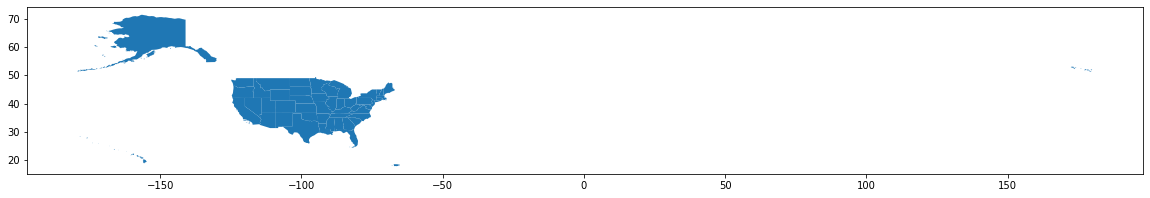

In [184]:
state_map_test = gpd.read_file('state.geo.json')
state_map_test
state_map_test.plot(figsize=(20,30))

In [196]:
# Get geojson file that includes Alaska
state_map = gpd.read_file("states.geojson")
print(state_count)
#df.sort_values(by=['col1'])
state_map = state_map.sort_values(by=['STATE_NAME'])
state_map['STATE_CODE'] = states2
state_map

CA                3516
NY                1754
TX                1548
GA                1520
NJ                1355
WA                1129
MA                1093
VA                 641
PA                 617
CT                 611
IL                 482
MD                 360
FL                 298
DC                 227
NC                 216
OH                 201
MI                 173
CO                 171
MN                 156
WI                 151
MO                 137
AZ                 131
RI                  80
TN                  67
OR                  57
NE                  55
NH                  55
IA                  49
SC                  47
DE                  46
                  ... 
Hyderabad            4
AB                   4
Md                   3
WV                   3
Reading              2
Guantanamo Bay       2
AK                   2
nan                  2
Ca                   2
WY                   2
Sunnyvale            1
MS                   1
Sacramento 

,STATE_NAME,REGION,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,geometry,STATE_CODE
42,Alabama,3,4785579,4798649,4813946,4827660,4840037,4850858,4860545,4874747,"MULTIPOLYGON (((-85.07007 31.98070, -85.11515 ...",AK
36,Arizona,4,6407002,6465488,6544211,6616124,6706435,6802262,6908642,7016270,"MULTIPOLYGON (((-114.52063 33.02771, -114.5590...",AZ
46,Arkansas,3,2921737,2938640,2949208,2956780,2964800,2975626,2988231,3004279,"MULTIPOLYGON (((-94.46169 34.19677, -94.45262 ...",AR
24,California,4,37327690,37672654,38019006,38347383,38701278,39032444,39296476,39536653,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823...",CA
31,Colorado,4,5048029,5116411,5186330,5262556,5342311,5440445,5530105,5607154,"MULTIPOLYGON (((-102.04446 37.64147, -102.0420...",CO
18,Connecticut,1,3580171,3591927,3597705,3602470,3600188,3593862,3587685,3588184,"MULTIPOLYGON (((-73.53039 41.52275, -73.51715 ...",CT
28,Delaware,3,899712,907884,916868,925114,934805,944107,952698,961939,"MULTIPOLYGON (((-75.70707 38.55759, -75.71071 ...",DE
27,District of Columbia,3,605040,620336,635630,650114,660797,672736,684336,693972,"MULTIPOLYGON (((-77.00793 38.96667, -76.91090 ...",DC
48,Florida,3,18846461,19097369,19341327,19584927,19897747,20268567,20656589,20984400,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ...",FL
44,Georgia,3,9712696,9810595,9911171,9981773,10083850,10199533,10313620,10429379,"MULTIPOLYGON (((-85.13017 31.77885, -85.13156 ...",GA


50


,STATE_NAME,REGION,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,geometry,STATE_CODE,JOB_COUNT
42,Alabama,3,4785579,4798649,4813946,4827660,4840037,4850858,4860545,4874747,"MULTIPOLYGON (((-85.07007 31.98070, -85.11515 ...",AK,2
36,Arizona,4,6407002,6465488,6544211,6616124,6706435,6802262,6908642,7016270,"MULTIPOLYGON (((-114.52063 33.02771, -114.5590...",AZ,64
46,Arkansas,3,2921737,2938640,2949208,2956780,2964800,2975626,2988231,3004279,"MULTIPOLYGON (((-94.46169 34.19677, -94.45262 ...",AR,4
24,California,4,37327690,37672654,38019006,38347383,38701278,39032444,39296476,39536653,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823...",CA,1824
31,Colorado,4,5048029,5116411,5186330,5262556,5342311,5440445,5530105,5607154,"MULTIPOLYGON (((-102.04446 37.64147, -102.0420...",CO,88
18,Connecticut,1,3580171,3591927,3597705,3602470,3600188,3593862,3587685,3588184,"MULTIPOLYGON (((-73.53039 41.52275, -73.51715 ...",CT,360
28,Delaware,3,899712,907884,916868,925114,934805,944107,952698,961939,"MULTIPOLYGON (((-75.70707 38.55759, -75.71071 ...",DE,30
27,District of Columbia,3,605040,620336,635630,650114,660797,672736,684336,693972,"MULTIPOLYGON (((-77.00793 38.96667, -76.91090 ...",DC,142
48,Florida,3,18846461,19097369,19341327,19584927,19897747,20268567,20656589,20984400,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ...",FL,151
44,Georgia,3,9712696,9810595,9911171,9981773,10083850,10199533,10313620,10429379,"MULTIPOLYGON (((-85.13017 31.77885, -85.13156 ...",GA,835


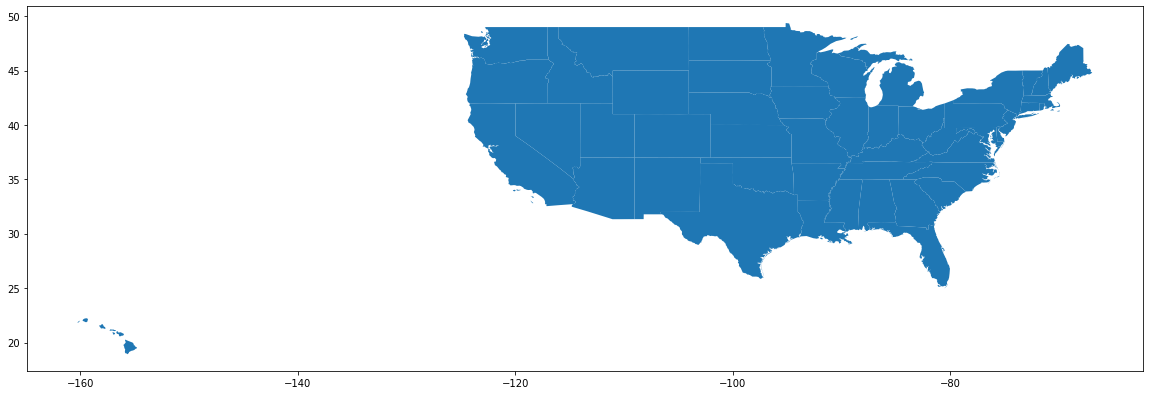

In [197]:
# Temporary way to plot map
state_map.plot(figsize=(20,30))
state_count_alpha = state_df_from_dict.sort_index()
state_count_alpha = state_df_from_dict.drop('AL')
state_map_list = state_count_alpha['Number'].tolist()
print(len(state_map_list))
state_map["JOB_COUNT"] = state_map_list
state_map

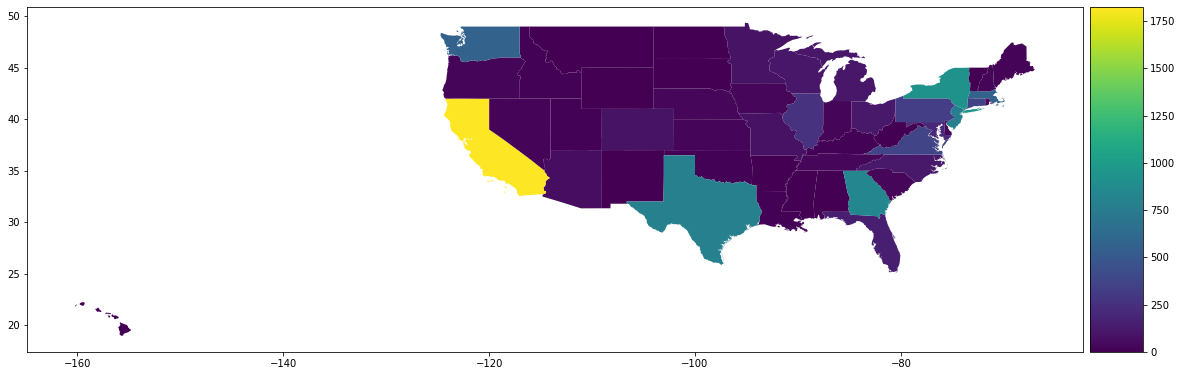

In [198]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

state_map.plot(column = 'JOB_COUNT', ax=ax, legend = True, cax = cax)

In [174]:
#state_map.plot(column = 'POPESTIMATE2011', figsize=(20,30), legend = True)

In [ ]:
#dataframe_maker(job_index_list_exec)
def dataframe_maker (job_index_list_exec):
    
    # create dataframe 'new_jobs'
    new_jobs = pd.DataFrame(job_index_list_exec, index = job_index_list_exec, columns = ["Job Number"])
    
    job_title_list = []
    job_company_list = []
    job_location_list = []
    job_desc_list = []
    
    # Loop
    for i in job_index_list_exec:
        job_title_list.append(jobs['jobtitle'].iloc[i])
        job_company_list.append(jobs['company'].iloc[i])
        job_location_list.append(jobs['state'].iloc[i])
        job_desc_list.append(jobs['jobdescription'].iloc[i])
        
    new_jobs["Job Title"] = job_title_list
    new_jobs["Company"] = job_company_list
    new_jobs["Location"] = job_location_list
    new_jobs["Description"] = job_desc_list
    
return new_jobs

In [ ]:
def drop_states(new_jobs):
    drop_list = []
    for state in new_jobs['Location']:
        if state not in states:
            drop_list.append(state)
    print(drop_list)

    state_count = new_jobs['Location'].value_counts()
    #print(type(state_count))
    state_count = state_count.drop(labels = drop_list)
    state_count = state_count.to_frame()
    #print(type(state_count))
    return state_count

In [ ]:
# Function(s) for other code done above
# Finish working on map and geopandas stuff
# Create the bar graph that groups the same words together -> 'lead' has multiple bars for the states it appears